

# **Fashion-MNIST**
 is a dataset of Zalando article photos, with  60,000 training samples and  10,000 test samples. Each sample is a 28x28 grayscale image which could be one of the available 10 classes.


#Each training and test example is assigned to one of the following labels:

**T-shirt/top / Trouser / Pullover /Dress / Coat / Sandal / Shirt / Sneaker / Bag / Ankle boot **

#Importing and exploring the dataset

Shape of the dataset

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
 
 
 
 
 
-----------------------------------------    Images of the Fashion MNIST dataset    -----------------------------------------


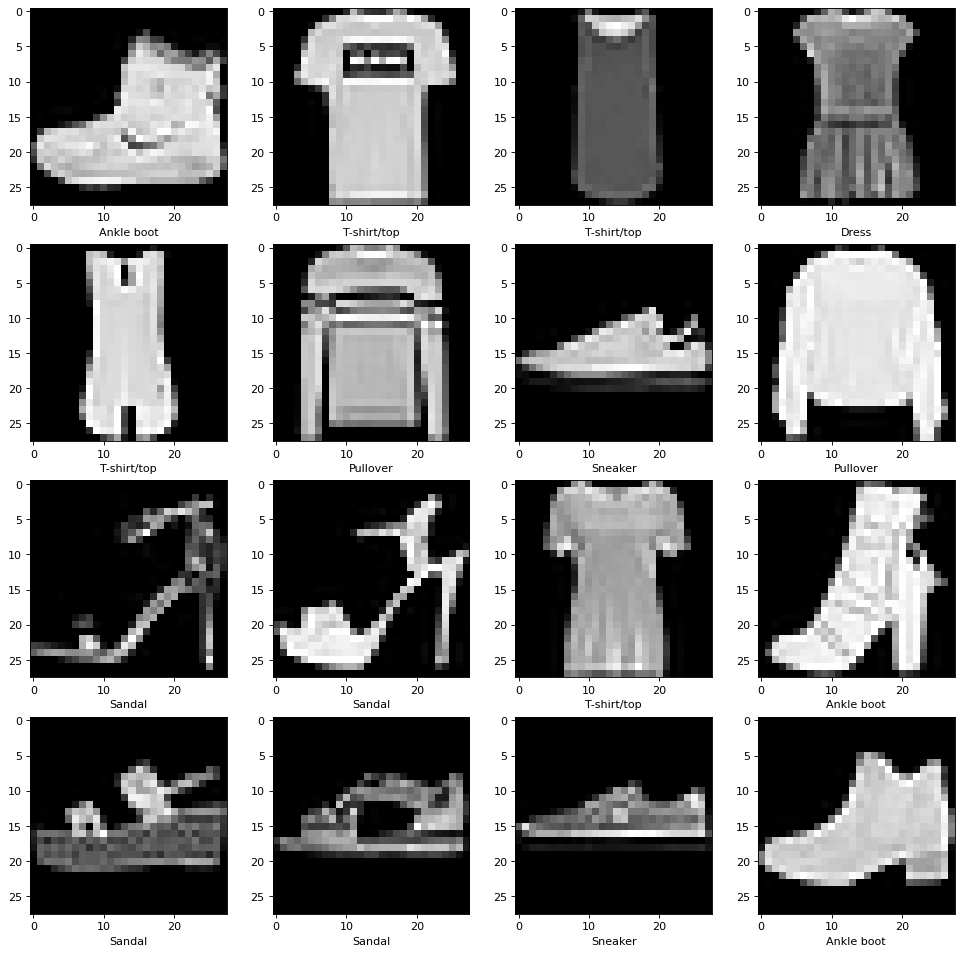

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
assert tf.__version__ >= "2.0"
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

fashion_mnist = tf.keras.datasets.fashion_mnist


(train_input, train_output), (test_input , test_output ) = fashion_mnist.load_data()
print("\033[1m" + 'Shape of the dataset' +   "\033[0m" + "\n" )
print('Train: X=%s, y=%s' % (train_input.shape, train_output.shape))
print('Test: X=%s, y=%s\n \n \n \n \n ' % (test_input.shape, test_output.shape))


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
figure(figsize=(15,15) , dpi = 80)
for i in range(16):
  plt.subplot( 4 , 4 , i+1 )
  plt.xlabel(class_names[train_output[i]])
  plt.imshow(train_input[i], cmap=plt.get_cmap('gray'))
  
  
txt = "    Images of the Fashion MNIST dataset    "
x = txt.center(125, "-")
print("\033[1m" + x + "\033[0m")
plt.show()
	
                  

#Data Pre-processing

In [ ]:
#Splitting train data into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(train_input, train_output, test_size=0.5)

# Since pixel intensities are on the scale of 0-255 bytes and they are uint8 type, we convert them to float data type and normalize them into the 0-1 range by dividing with 255
x_train = x_train.astype('float32')/255.
x_valid = x_valid.astype('float32')/255.
x_test = test_input.astype('float32')/255.


#Model building

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(200, activation='relu',kernel_initializer='he_normal')) # Xavier & He Initialization for weights
model.add(Dense(100, activation='relu',kernel_initializer='he_normal')) #For the hidden layers relu activation function was used inorder to avoid the problem of vanishing gradient 
model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax',kernel_initializer='he_normal')) # Since we are dealing with a multi-class classification problem softmax was used at at the output layer
model.summary()

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


#Training the neural network

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) # Using stochastic gradient descent optimizer to adjust the parameters for reducing the loss/errors.

# Training the model
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_valid , y_valid))
print(model.summary())



Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 0.7912 - accuracy: 0.7395 - val_loss: 0.6066 - val_accuracy: 0.7893
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.5235 - accuracy: 0.8174 - val_loss: 0.4812 - val_accuracy: 0.8302
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 0.4714 - accuracy: 0.8351 - val_loss: 0.5449 - val_accuracy: 0.7960
Epoch 4/50
938/938 [==============================] - 6s 6ms/step - loss: 0.4368 - accuracy: 0.8471 - val_loss: 0.4383 - val_accuracy: 0.8461
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 0.4158 - accuracy: 0.8530 - val_loss: 0.4361 - val_accuracy: 0.8455
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.3954 - accuracy: 0.8612 - val_loss: 0.4119 - val_accuracy: 0.8539
Epoch 7/50
938/938 [==============================] - 4s 5ms/step - loss: 0.3796 - accuracy: 0.8646 - val_loss: 0.4042 - val_accuracy: 0.8539
Epoch 

# Model training results

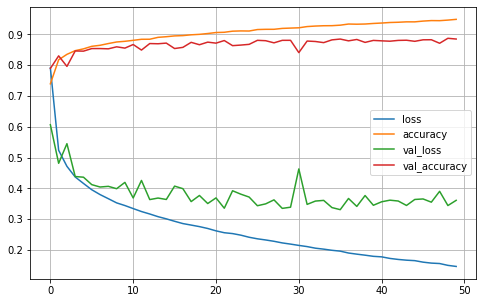

Test loss: 0.4098310172557831
Test accuracy: 0.8751999735832214


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()
	
model_score = model.evaluate(x_test, test_output, verbose=0)
print('Test loss:', model_score[0])
print('Test accuracy:', model_score[1])